In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.offline as pyoff
import statsmodels.api as sm
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import math

In [48]:
df = pd.read_csv(r'C:\Users\sunsar\_SELECT_fpsd_REFERENCE_DATE_dc_MARKET_COUNTRY_sum_GWR_FROM_mi_FV_202305030947.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4304 entries, 0 to 4303
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REFERENCE_DATE  1946 non-null   object 
 1   MARKET_COUNTRY  1946 non-null   object 
 2   SUM(GWR)        1946 non-null   float64
dtypes: float64(1), object(2)
memory usage: 101.0+ KB


In [49]:
df['date'] = pd.to_datetime(df['REFERENCE_DATE'], format='%m/%d/%Y')

In [50]:
df.drop('REFERENCE_DATE', axis=1, inplace=True)

In [51]:
df.rename(columns={"SUM(GWR)": "sales"}, inplace=True)

In [52]:
df.head()

,MARKET_COUNTRY,sales,date
0,Sweden,363564.75,2023-04-30
1,Sweden,312066.14,2023-04-29
2,Sweden,296383.22,2023-04-28
3,Sweden,305736.67,2023-04-27
4,Sweden,382729.52,2023-04-26


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4304 entries, 0 to 4303
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MARKET_COUNTRY  1946 non-null   object        
 1   sales           1946 non-null   float64       
 2   date            1946 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 101.0+ KB


In [54]:
df['date'] = pd.to_datetime(df['date'])
#groupby date and sum the sales
df_sales = df.groupby('date').sales.sum().reset_index()

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1946 non-null   datetime64[ns]
 1   sales   1946 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.5 KB


In [55]:
#plot daily sales
plot_data = [
    go.Scatter(
        x=df_sales['date'],
        y=df_sales['sales'],
    )
]
plot_layout = go.Layout(
        title='Daily Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [56]:
#represent month in date field as its first day
df['Month_year'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
#groupby date and sum the sales
df_sales_month = df.groupby('Month_year').sales.sum().reset_index()

df_sales_month.head()

,Month_year,sales
0,2018-01,10700289.29
1,2018-02,8141458.99
2,2018-03,9669299.31
3,2018-04,8681905.39
4,2018-05,9166338.75


In [57]:
#plot Monthly sales
plot_data = [
    go.Scatter(
        x=df_sales_month['Month_year'],
        y=df_sales_month['sales'],
    )
]
plot_layout = go.Layout(
        title='Monthly Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [58]:
df_sales['SMA_5'] = df_sales.sales.rolling(20, min_periods=1).mean()
df_sales['SMA_7'] = df_sales.sales.rolling(50, min_periods=1).mean()

df_sales.head()

,date,sales,SMA_5,SMA_7
0,2018-01-01,275459.35,275459.350,275459.350
1,2018-01-02,189306.89,232383.120,232383.120
2,2018-01-03,266698.23,243821.490,243821.490
3,2018-01-04,437494.29,292239.690,292239.690
4,2018-01-05,-2641.92,233263.368,233263.368


In [59]:
# Grean = Avg sales, RED = 5 days, ORANG colors for the line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_sales['date'],y=df_sales['sales'],mode='lines',
                    name='sales'))
fig.add_trace(go.Scatter(x=df_sales['date'],y=df_sales['SMA_5'],mode='lines',
                    name='SMA_5'))
fig.add_trace(go.Scatter(x=df_sales['date'],y=df_sales['SMA_7'],mode='lines',
                    name='SMA_7'))
fig.show()

In [60]:
df_sales['day']=df_sales['date'].dt.day
df_sales_day = df_sales.groupby('day').sales.sum().reset_index()

#plot Monthly sales
plot_data = [
    go.Scatter(
        x=df_sales_day['day'],
        y=df_sales_day['sales'],
    )
]
plot_layout = go.Layout(
        title='Daily Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [61]:
df_sales = df_sales.groupby('date')['SMA_7'].sum().reset_index()

In [62]:
df_sales = df_sales.set_index('date')
df_sales.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', name='date', length=1946, freq=None)

In [63]:
y = df_sales['SMA_7'].resample('MS').mean()
#y = df_sales['sales']

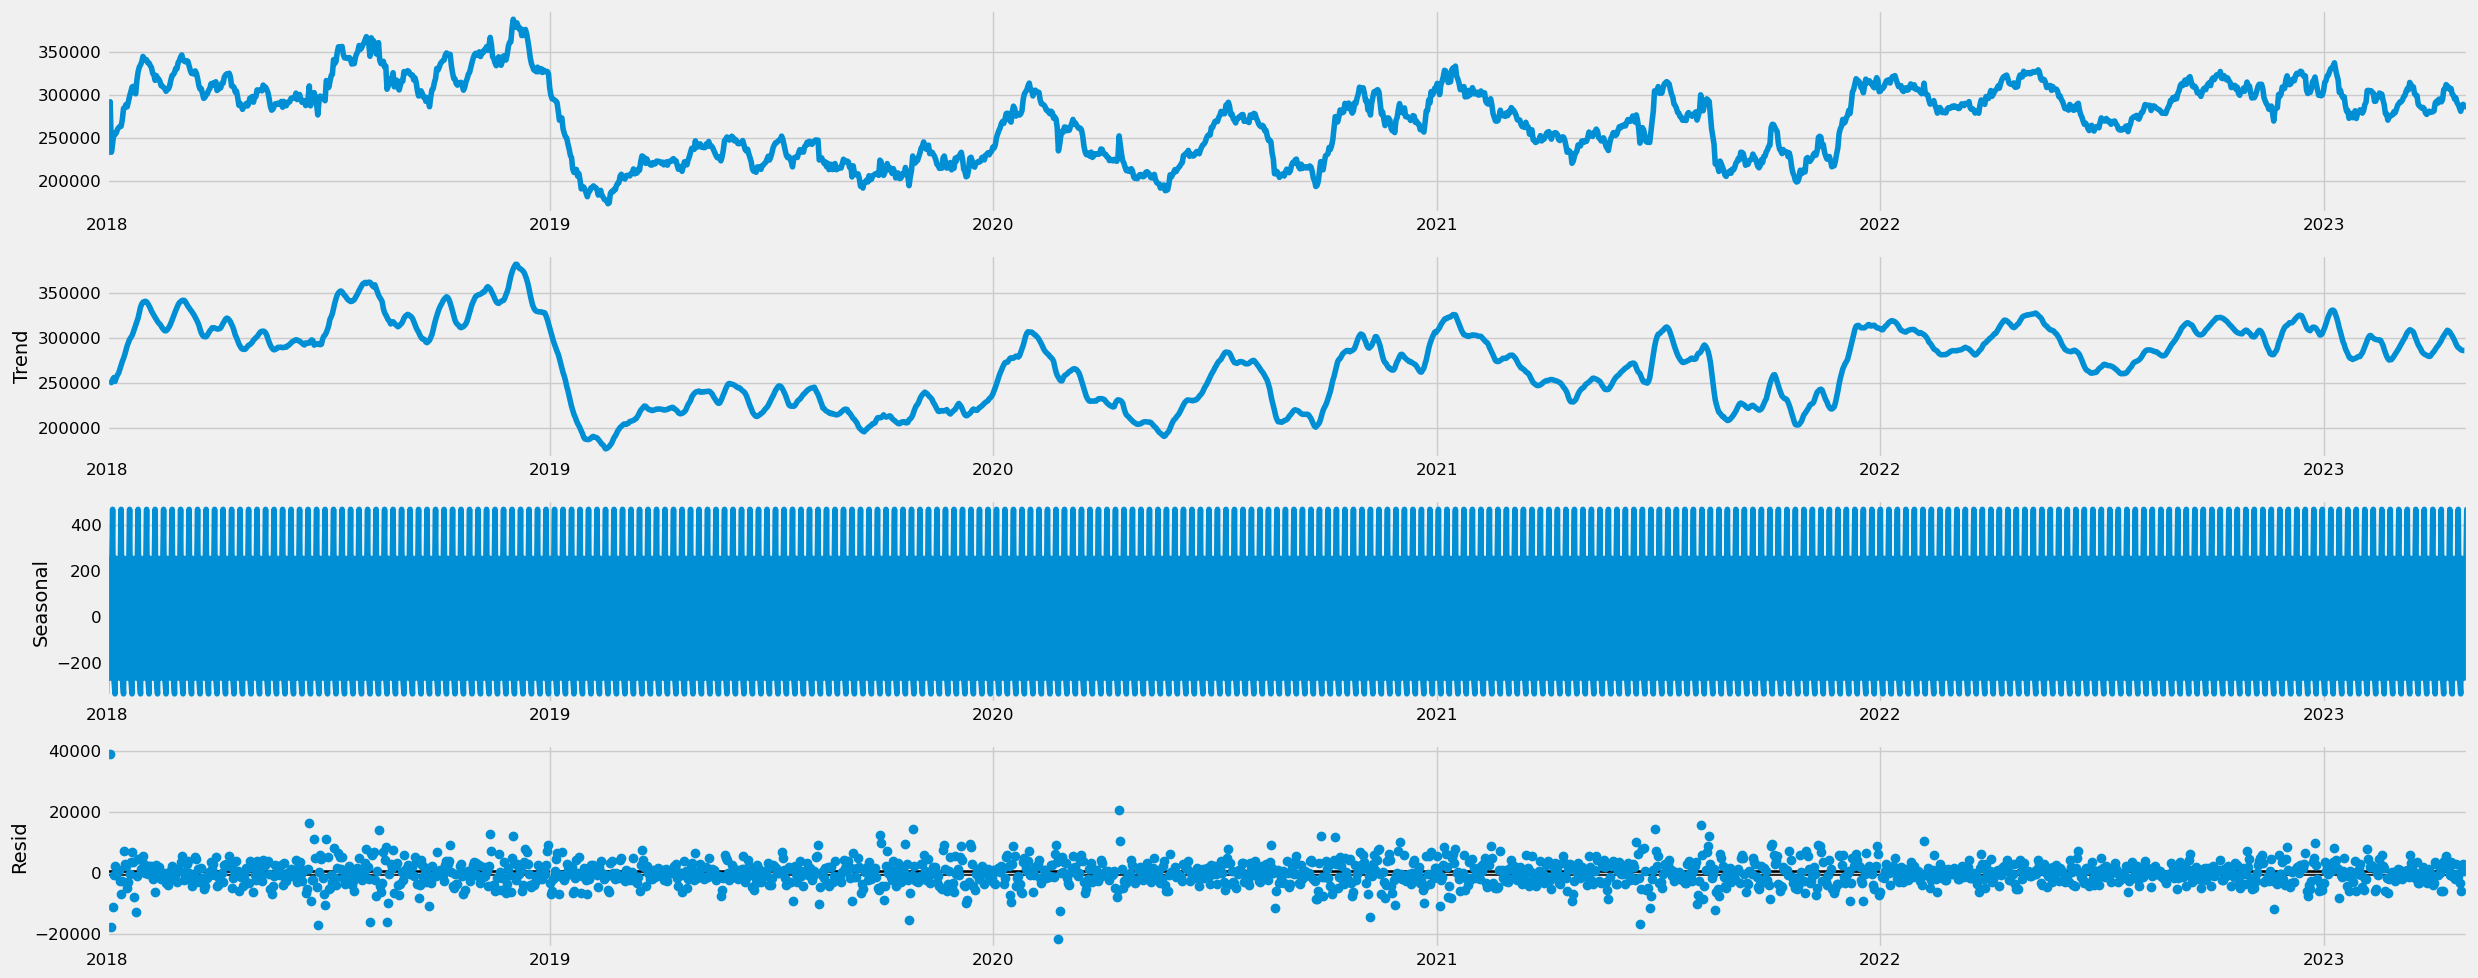

In [64]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10

decomposition = sm.tsa.seasonal_decompose(df_sales, model='additive')
fig = decomposition.plot()
plt.show()

In [65]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [66]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1759.118059038287
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1397.78925034937
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1271.8808271613445
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:940.026671018386
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1294.4100316138654
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1197.7683838707335
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:957.2694614947793
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:939.1092415758462
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1687.890629690034
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1355.0724865725156
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1207.405130128038
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:899.5788250548333
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1404.171456312031
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1351.4042447238694
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:946.8252816273957
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:901.1171811290056
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1449.4950842309559
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1159.4196826920754
ARIMA

In [67]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2809      0.344      0.817      0.414      -0.393       0.955
ma.S.L12      -0.4689      0.309     -1.519      0.129      -1.074       0.136
sigma2      1.544e+09   2.72e-12   5.67e+20      0.000    1.54e+09    1.54e+09


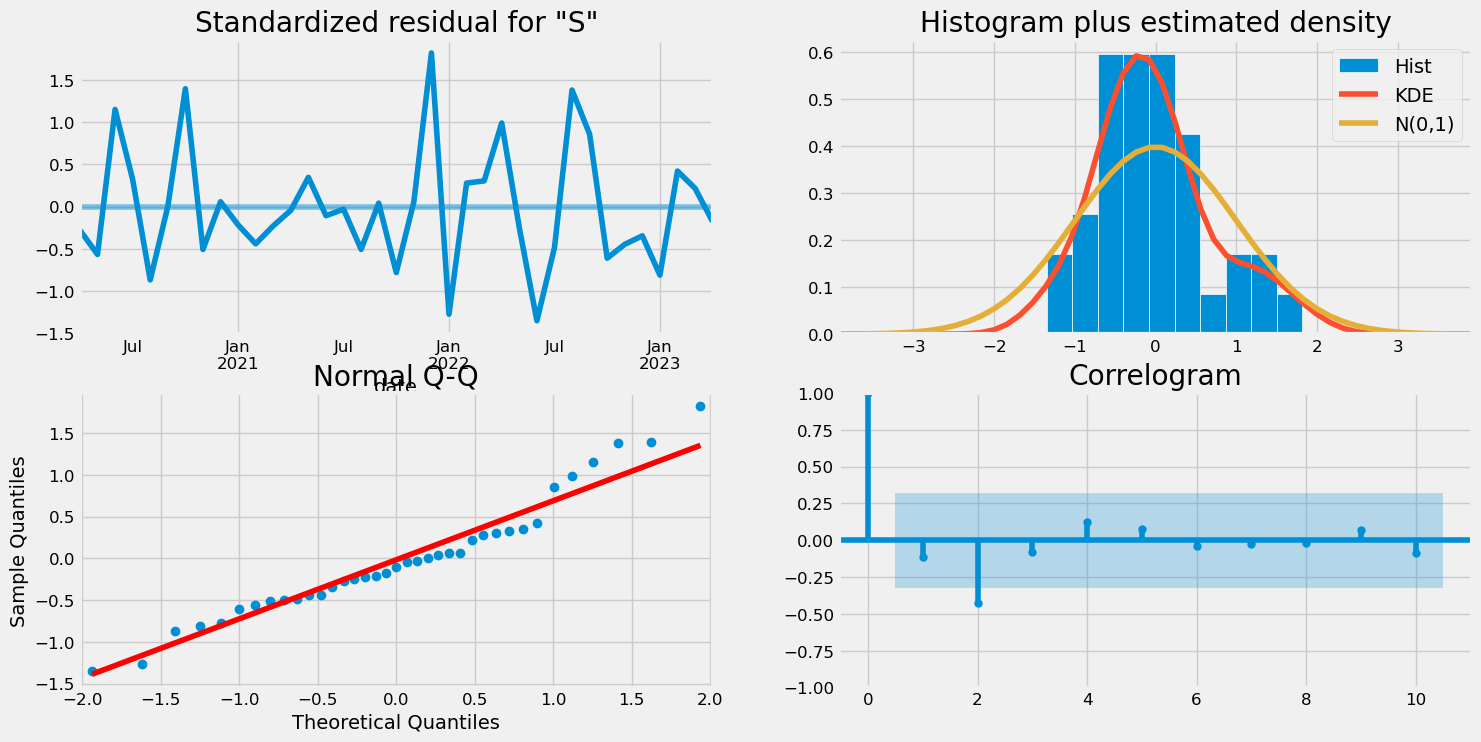

In [68]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

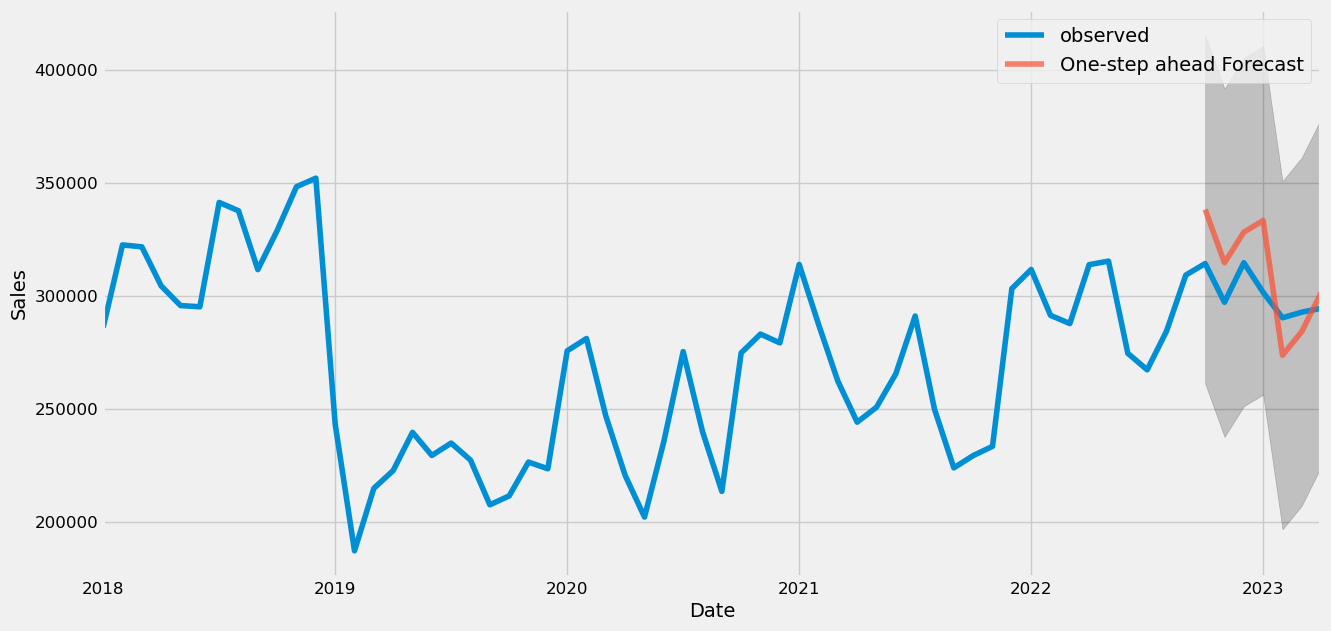

In [69]:
pred = results.get_prediction(start=pd.to_datetime('2022-10-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [70]:
y_forecasted = pred.predicted_mean
y_truth = y['2023-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 351832871.51


In [71]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 18757.21


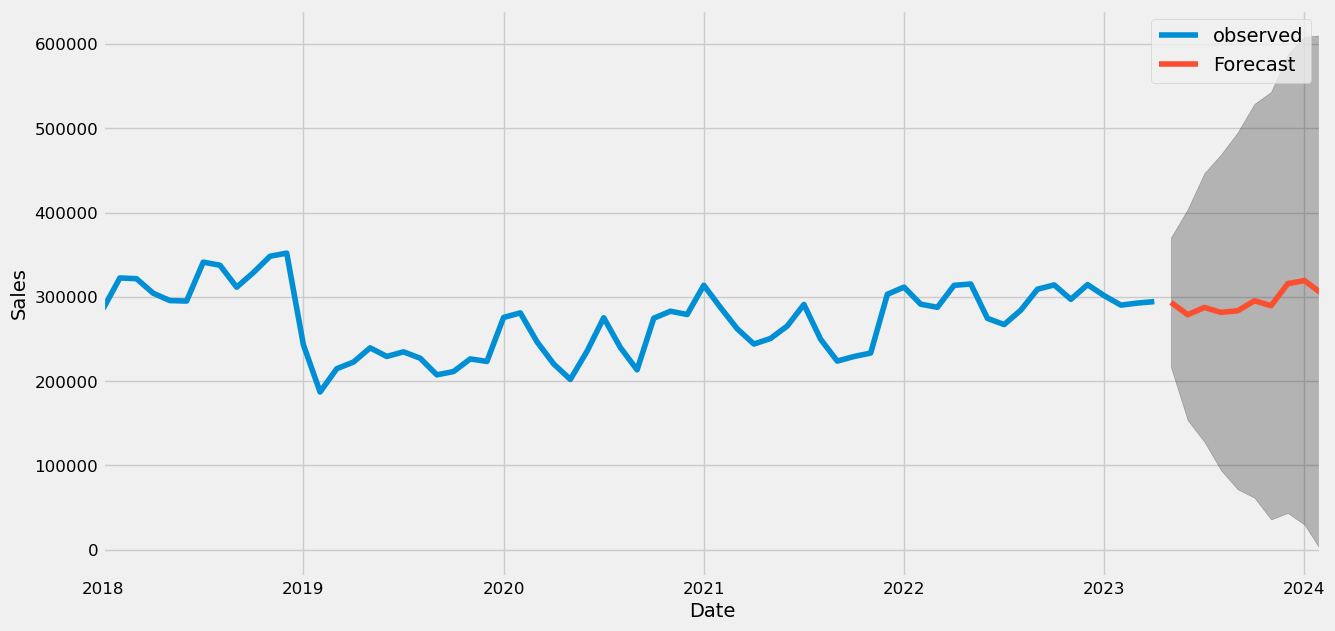

In [72]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [73]:
pred_uc.predicted_mean

2023-05-01    293528.355623
2023-06-01    278882.164839
2023-07-01    287501.419026
2023-08-01    281664.063723
2023-09-01    283552.701286
2023-10-01    295422.524945
2023-11-01    289630.134807
2023-12-01    315771.236560
2024-01-01    319346.099713
2024-02-01    304554.389513
Freq: MS, Name: predicted_mean, dtype: float64